In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
data = pd.read_parquet('./data/titanic.parquet')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_male
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S,True
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S,False
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,False,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,None,S,True
887,888,True,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,False
888,889,False,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,None,S,False
889,890,True,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,True


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    bool    
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
 12  is_male      891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 72.5+ KB


In [4]:
corr = data.corr(numeric_only=True)

corr.values[np.eye(len(corr), dtype=bool)] = np.nan

corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,is_male
PassengerId,NaN,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939
Survived,-0.005007,NaN,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351
Pclass,-0.035144,-0.338481,NaN,-0.369226,0.083081,0.018443,-0.549500,0.131900
Age,0.036847,-0.077221,-0.369226,NaN,-0.308247,-0.189119,0.096067,0.093254
SibSp,-0.057527,-0.035322,0.083081,-0.308247,NaN,0.414838,0.159651,-0.114631
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,NaN,0.216225,-0.245489
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,NaN,-0.182333
is_male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,NaN


In [5]:
fig = px.imshow(
    corr,
    text_auto=True,
    aspect='auto',
    # color_continuous_scale=px.colors.sequential.RdBu_r,
    color_continuous_scale=px.colors.diverging.RdBu_r,
    template='plotly_dark',
    )

fig.update_coloraxes(cmid=0.0)

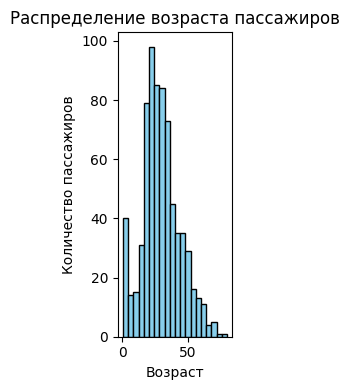

In [17]:


import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(2, 4))

ax.hist(
    data["Age"].dropna(),
    bins=20,
    color="skyblue",
    edgecolor="black",
)

ax.set_title("Распределение возраста пассажиров")
ax.set_xlabel("Возраст")
ax.set_ylabel("Количество пассажиров")

plt.tight_layout()
plt.show()




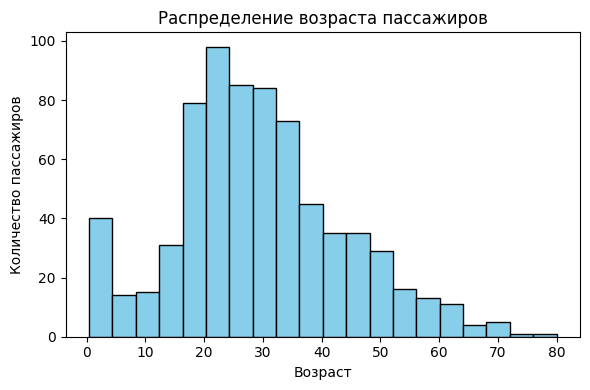

In [7]:
import matplotlib.pyplot as plt

ax = data["Age"].plot(
    kind="hist",
    bins=20,
    color="skyblue",
    edgecolor="black",
    title="Распределение возраста пассажиров",
    figsize=(6, 4)
)

ax.set_xlabel("Возраст")
ax.set_ylabel("Количество пассажиров")

plt.tight_layout()
plt.show()

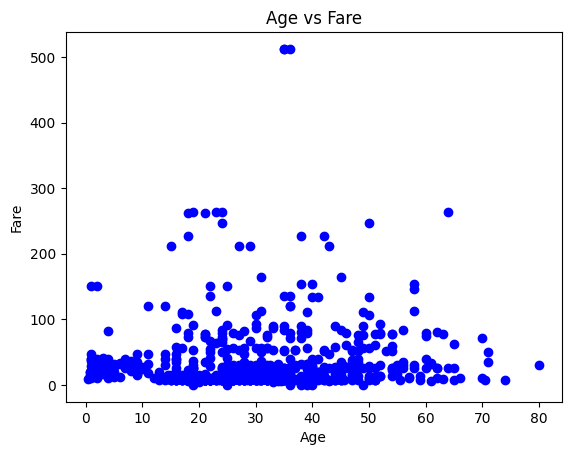

In [20]:
# import matplotlib.pyplot as plt

plt.scatter(data["Age"], data["Fare"], color="blue")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Age vs Fare")
plt.show()

<Axes: xlabel='Age', ylabel='Fare'>

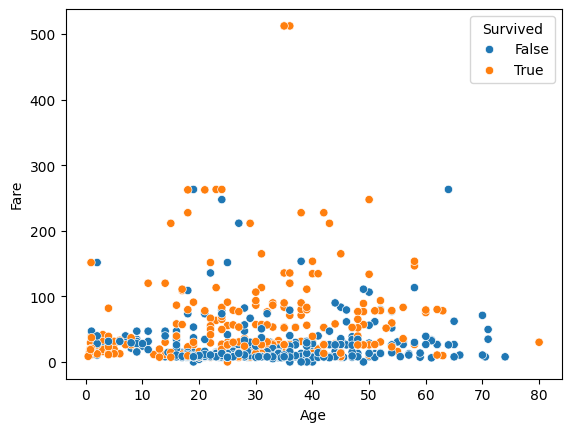

In [12]:
import seaborn as sns

sns.scatterplot(data=data, x="Age", y="Fare", hue="Survived")

In [22]:
import plotly.express as px

fig = px.scatter(
    data_frame=data,
    x="Age",
    y="Fare",
    color="Survived",
    size="Pclass",
    hover_name='Name',
    symbol="is_male",
    title="Age vs Fare",
)

fig.show()

In [14]:
fig = px.scatter_3d(
    data_frame=data,
    x="Age",       
    y="Fare",        
    z="Pclass",       
    color="Survived", 
    symbol="Sex",    
    hover_name='Name',
    title="Titanic",
    opacity=0.7,
    size="Fare",     
    template='plotly_dark',
)

fig.update_traces(marker=dict(line=dict(width=0)))  # убрать обводку
fig.show()

<Axes: ylabel='Frequency'>

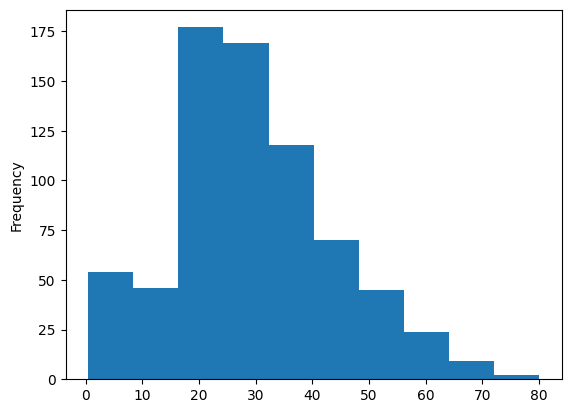

In [19]:
data['Age'].plot.hist()